# Лабораторная работа №4. LU-разложение

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Исходные СЛАУ

$A_1x = b_1$:
\begin{equation}
	\begin{bmatrix}
		1 & 1 & 0 & 3 \\
		2 & 1 & -1 & 1 \\
		3 & -1 & -1 & 2 \\
		-1 & 2 & 3 & -1
	\end{bmatrix}
	\begin{bmatrix}
		x_1 \\
		x_2 \\
		x_3 \\
		x_4
	\end{bmatrix}
	=
	\begin{bmatrix}
		4 \\
		1 \\
		-3 \\
		4
	\end{bmatrix}
\end{equation}

$A_2x = b_2$:
\begin{equation}
	\begin{bmatrix}
		3 & 1 & -3 \\
		6 & 2 & 5 \\
		1 & 4 & -3
	\end{bmatrix}
	\begin{bmatrix}
		x_1 \\
		x_2 \\
		x_3
	\end{bmatrix}
	=
	\begin{bmatrix}
		-16 \\
		12 \\
		-39
	\end{bmatrix}
\end{equation}

## LU-разложение

In [2]:
def lu(A):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)
  for i in range(n):
    M = np.eye(n)

    for j in range(i+1, n):
      m_i = U[j, i] / U[i, i]
      M[j, i] = -m_i

    U = M @ U
    L = L @ np.linalg.inv(M)
  return L, U

## Решение СЛАУ с использованием LU-разложения

In [3]:
def solve(L, U, b):
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

## Решение СЛАУ $A_1x = b_1$

In [4]:
A1 = np.array([[1., 1., 0., 3.],
               [2., 1., -1., 1.],
               [3., -1., -1., 2.],
               [-1., 2., 3., -1.]])
b1 = np.array([4., 1., -3., 4.])

L, U = lu(A1)
# print("L:\n", L)
# print("U:\n", U)
ans_1 = solve(L, U, b1)
print(f"Solve is: [ {ans_1[0]:.6f}, {ans_1[1]:.6f}, {ans_1[2]:.6f}, {ans_1[3]:.6f} ]")

Solve is: [ -1.000000, 2.000000, 0.000000, 1.000000 ]


## Модифицированная функция LU-разложения

In [5]:
def lu(A, Permute):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)
    P = np.eye(n)

    for i in range(n):
        if Permute:
            max_idx = np.argmax(np.abs(U[i:, i])) + i
            if max_idx != i:
                U[[i, max_idx], :] = U[[max_idx, i], :]
                P[[i, max_idx], :] = P[[max_idx, i], :]
                if i > 0:
                    L[[i, max_idx], :i] = L[[max_idx, i], :i]

        M = np.eye(n)
        for j in range(i+1, n):
            m_i = U[j,i] / U[i,i]
            M[j, i] = -m_i

        U = M @ U
        L = L @ np.linalg.inv(M)

    return L, U, P

## Модифицированная функция решения СЛАУ

In [6]:
def solve(L, U, P, b):
    b = P @ b
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

## Решение СЛАУ $A_2x = b_2$

In [7]:
A2 = np.array([[3., 1., -3.], [6., 2., 5.], [1., 4., -3.]])
b2 = np.array([-16., 12., -39.])
L, U, P = lu(A2, True)
# print("L:\n", L)
# print("U:\n", U)
# print("P:\n", P)
ans_2 = solve(L,U,P,b2)
print(f"Solve is: [ {ans_2[0]:.6f}, {ans_2[1]:.6f}, {ans_2[2]:.6f} ]")

Solve is: [ 1.000000, -7.000000, 4.000000 ]


## Log-log график относительной погрешности $E = \frac{\|\hat{x} - \tilde{x}\|_\infty}{\|\hat{x}\|_\infty}$

In [8]:
relative_errors_false = []
relative_errors_true = []
for p in range(0, 13):
    k = 10**(-p)
    A1 = np.array([[3 + k, 1., -3.], [6., 2., 5.], [1., 4., -3.]])
    b1 = np.array([-16 + k, 12., -39.])

    L = np.eye(len(A1))
    L,U,P = lu(A1, False)
    x = solve(L,U,P,b1)
    print(f"Solve for FALSE, when p = {p}, is: {x[0]:.6f}, {x[1]:.6f}, {x[2]:.6f}")
    error = np.linalg.norm(ans_2 - x) / np.linalg.norm(ans_2)
    relative_errors_false.append(error)

print()
for p in range(0, 13):
    k = 10**(-p)
    A1 = np.array([[3 + k, 1., -3.], [6., 2., 5.], [1., 4., -3.]])
    b1 = np.array([-16 + k, 12., -39.])

    L = np.eye(len(A1))
    L,U,P = lu(A1, True)
    x = solve(L,U,P,b1)
    print(f"Solve for TRUE, when p = {p}, is: {x[0]:.6f}, {x[1]:.6f}, {x[2]:.6f}")
    error = np.linalg.norm(ans_2 - x) / np.linalg.norm(ans_2)
    relative_errors_true.append(error)

Solve for FALSE, when p = 0, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 1, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 2, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 3, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 4, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 5, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 6, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 7, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 8, is: 1.000000, -7.000001, 4.000000
Solve for FALSE, when p = 9, is: 1.000000, -7.000000, 4.000000
Solve for FALSE, when p = 10, is: 0.999982, -6.999947, 4.000000
Solve for FALSE, when p = 11, is: 1.000089, -7.000266, 4.000000
Solve for FALSE, when p = 12, is: 1.000333, -7.000999, 4.000000

Solve for TRUE, when p = 0, is: 1.000000, -7.000000, 4.000000
Solve for TRUE, when p = 1, is: 1.000000, -7.000000, 4.000000
Solve for TRUE, when p = 2, is: 1.000000, -7.000000, 

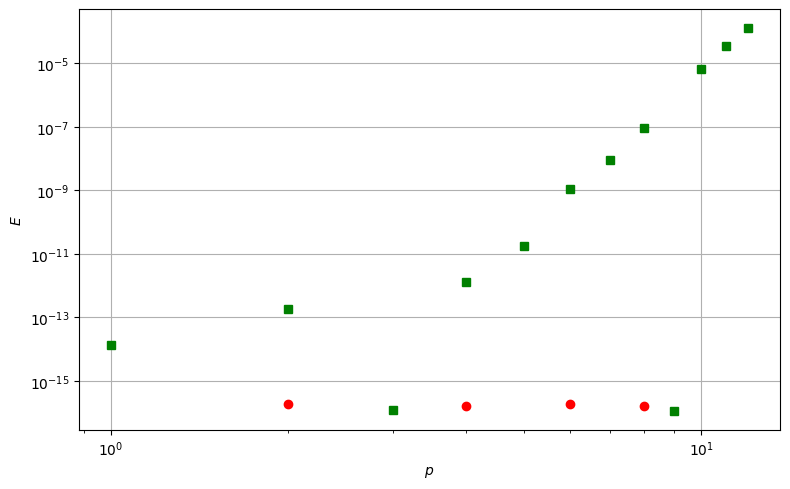

In [9]:
fig = plt.figure(figsize=(8, 5))
plt.loglog(range(0,13), relative_errors_false, 's', color="green", label=r'$\frac{||\hat{x} - \tilde{x}||_{\infty}}{||\hat{x}||_{\infty}}$, False')
plt.loglog(range(0,13), relative_errors_true, 'o', color="red", label=r'$\frac{||\hat{x} - \tilde{x}||_{\infty}}{||\hat{x}||_{\infty}}$, True')
plt.xlabel('$p$')
plt.ylabel("$E$")
plt.grid(True)
fig.tight_layout()
plt.savefig('E.png',dpi=350)
plt.show()